<a href="https://colab.research.google.com/github/Farmata94/ML-FinalProject/blob/master/ML_FinalProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MPA-MLF - Final project - ISEP**
# **Classification 5G base stations**
CISSE Farmata

MBONGO Noémie


In [43]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


## **Import libraries**

In [44]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping


#  **Dataset**

In [45]:
# Loading numpy files in Train and Test folders
def load_npy_folder(folder_path):
    file_list = sorted([f for f in os.listdir(folder_path) if f.endswith('.npy')], key=lambda x: int(x.split('.')[0]))
    data = [np.load(os.path.join(folder_path, f)) for f in file_list]
    return np.stack(data)

train_data_path = 'drive/MyDrive/ML-FinalProject/Train/'
test_data_path = 'drive/MyDrive/ML-FinalProject/Test/'
labels_df = pd.read_csv('drive/MyDrive/ML-FinalProject/label_train.csv')

train_data = load_npy_folder(train_data_path)
test_data = load_npy_folder(test_data_path)
train_labels = labels_df["target"].values


# Split train validation
X_train, X_test, y_train, y_test = train_test_split(train_data, train_labels, test_size=0.2, random_state=42)

# Normalisation
# X_train, X_test, test_data = X_train / 255.0, X_test / 255.0, test_data / 255.0

# One-Hot label encoding
y_train = to_categorical(y_train, num_classes=3)
y_test = to_categorical(y_test, num_classes=3)

# Reshape pour CNN
X_train = X_train.reshape(-1, 72, 48, 1)
X_test = X_test.reshape(-1, 72, 48, 1)
test_data = test_data.reshape(-1, 72, 48, 1)


# **Build the model**

In [47]:
# Define the model structure

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(72, 48, 1)),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    Flatten(),

    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(3, activation='softmax')
])

# Compile the model

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_23 (Conv2D)              │ (None, 70, 46, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_23          │ (None, 70, 46, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_23 (MaxPooling2D) │ (None, 35, 23, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_31 (Dropout)            │ (None, 35, 23, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_24 (Conv2D)              │ (None, 33, 21, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_24          │ (None, 33, 21, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_24 (MaxPooling2D) │ (None, 16, 10, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_32 (Dropout)            │ (None, 16, 10, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_8 (Flatten)             │ (None, 10240)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 128)            │     1,310,848 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_33 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,330,435 (5.08 MB)

 Trainable params: 1,330,243 (5.07 MB)

 Non-trainable params: 192 (768.00 B)

# **Training stage**

In [48]:
# Model training
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
history= model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stop])



Epoch 1/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 14s 281ms/step - accuracy: 0.7774 - loss: 3.1059 - val_accuracy: 0.8395 - val_loss: 5.3872
Epoch 2/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 10s 261ms/step - accuracy: 0.8980 - loss: 0.2556 - val_accuracy: 0.8763 - val_loss: 1.7621
Epoch 3/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 9s 220ms/step - accuracy: 0.9461 - loss: 0.1535 - val_accuracy: 0.9030 - val_loss: 0.4386
Epoch 4/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 12s 258ms/step - accuracy: 0.9397 - loss: 0.1349 - val_accuracy: 0.9264 - val_loss: 0.1934
Epoch 5/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 20s 263ms/step - accuracy: 0.9728 - loss: 0.0653 - val_accuracy: 0.9799 - val_loss: 0.0580
Epoch 6/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 9s 221ms/step - accuracy: 0.9877 - loss: 0.0389 - val_accuracy: 0.9866 - val_loss: 0.0411
Epoch 7/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 11s 251ms/step - accuracy: 0.9803 - loss: 0.0439 - val_accuracy: 0.9498 - val_loss: 0.1090
Epoch 8/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 10s 268ms/step - accuracy: 0.9813 - loss: 0.0373 - val_accura

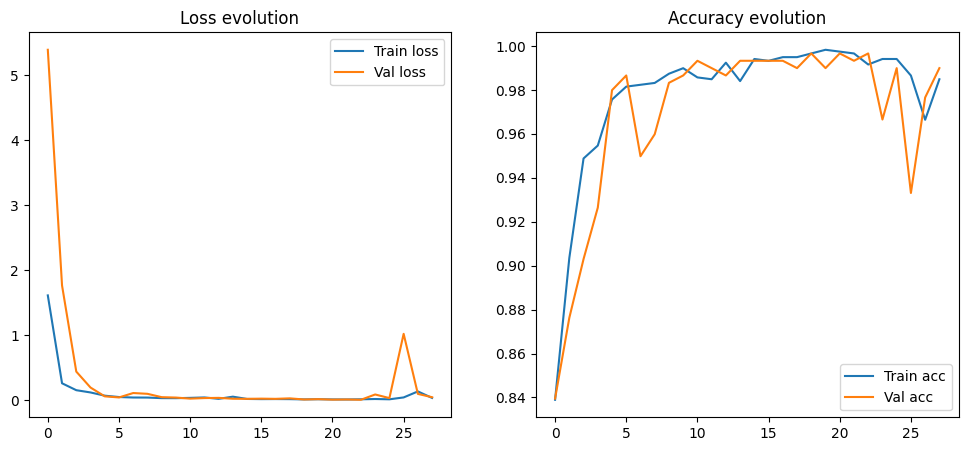

In [49]:
# Model Evaluation on validation data
plt.figure(figsize=(12, 5))

# Loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Val loss')
plt.legend()
plt.title("Loss evolution")

# Accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train acc')
plt.plot(history.history['val_accuracy'], label='Val acc')
plt.legend()
plt.title("Accuracy evolution")

plt.show()

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 76ms/step - accuracy: 0.9973 - loss: 0.0045
Test Accuracy: 0.9967


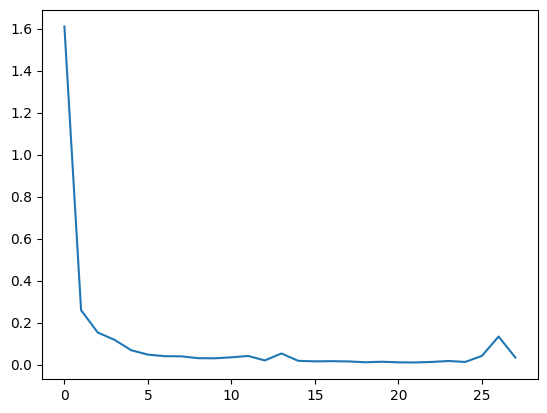

In [50]:
# Model evaluation
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy:.4f}")


plt.figure()
plt.plot(history.history['loss'])

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step


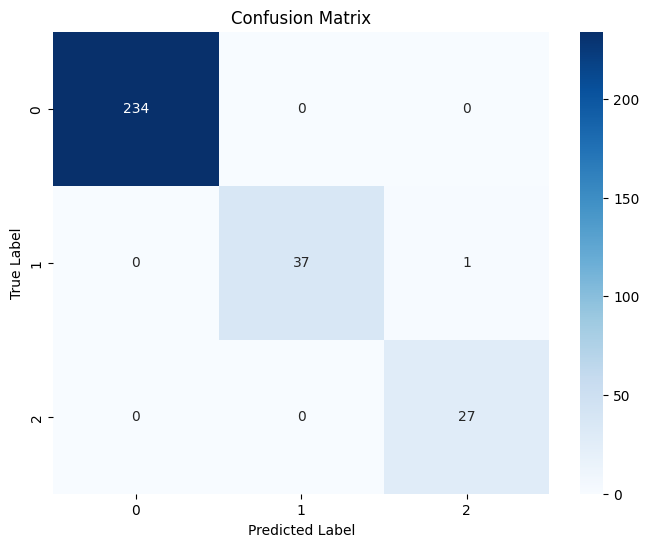

In [51]:
# Prediction
predictions = model.predict(X_test)
predicted_labels = np.argmax(predictions, axis=1)
predicted_true = np.argmax(y_test, axis=1)


conf_matrix = confusion_matrix(predicted_true, predicted_labels)

plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=range(3), yticklabels=range(3))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [52]:
# Kaggle
test_preds = model.predict(test_data)
test_labels = np.argmax(test_preds, axis=1)

submission = pd.DataFrame({"ID": np.arange(len(test_data)), "target": test_labels})
submission.to_csv("drive/MyDrive/ML-FinalProject/test_format.csv", index=False)




4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
